# In-Depth: Decision Trees and Ensemble Tree Models

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Creating a decision tree classifer

Consider the following two-dimensional data, which has one of four class labels:

[[ 0.02458305  2.96215652]
 [-1.52392631  7.12573205]
 [ 1.27450825  5.63017322]
 [-0.86552334  7.80121774]
 [ 0.74874067  2.55579434]]
[1 3 0 3 1]


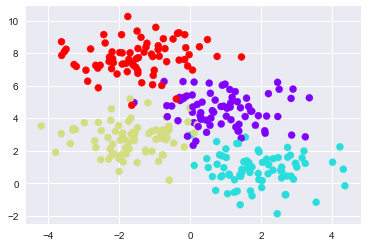

In [9]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

print(X[0:5,:]) #look at X
print(y[0:5]) #look at y, it has four class labels

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it.
This figure presents a visualization of the first four levels of a decision tree classifier for this data:

This process of fitting a decision tree to our data can be done in Scikit-Learn with the ``DecisionTreeClassifier`` estimator:

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
model = tree.fit(X,y)

print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


# Parameters of Interest

 - max_depth:
     - tunes the number of times internal nodes are split.  (i.e. - tree size parameter)

 - criterion:
     - 'gini' or 'entropy'  

 - min_samples_leaf:
     - set threshold for minimum number of observations per terminal node.  (also a tree size parameter)

# Use DecisionTreeRegressor() for regression models

In [25]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0)
model = regressor.fit(boston.data,boston.target) #note our criterion is mse
print(model) #Tune same parameters as above.

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')


Just as using information from two trees improves our results, we might expect that using information from many trees would improve our results even further.

# Extract important variables from model fit object

In [35]:
print(model.feature_importances_) 
#in same order as feature names in data
boston.feature_names # RM is most important variable in model.  Variable measures the Number of rooms.

[0.01952982 0.00144589 0.00201177 0.00165055 0.06140124 0.58999058
 0.00954201 0.07483559 0.00130838 0.01405075 0.00699816 0.00660209
 0.21063316]


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

# Ensembles of Estimators: Random Forests

In [52]:
#Classification model example first...

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Random Forest Regression

In the previous section we considered random forests within the context of classification.
Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is the ``RandomForestRegressor``, and the syntax is very similar to what we saw earlier.

Consider the following data, drawn from the combination of a fast and slow oscillation:

In [51]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=200)
forest.fit(boston.data,boston.target)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Parameters of Interest for Random Forest Models

 - n_estimators:
     - Number of trees to generate for model

 - max_depth:
     - tunes the number of times internal nodes are split.  (i.e.-tree size)

 - max_features:
     - Number of randomly selected features per split.

 - criterion:
     - 'gini' or 'entropy' for classification and 'mse' for regression

 - min_samples_leaf:
     - set threshold for minimum number of observations per terminal node.  (also a tree size parameter)

 - oob_score:
     - returns out of bag score in model fit object.  Extract result by printing the 'estimators_features_' from model fit object. 

# Ensembles of Estimators: Bagging


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier() #Need to instantiate a model type for bagging first
bag = BaggingClassifier(tree, n_estimators=100, 
                        random_state=1)

bag.fit(X, y)



BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

## Bagging Regression

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor


tree = DecisionTreeRegressor() #Need to instantiate a model type for bagging first

bag = BaggingRegressor(tree, n_estimators=100, 
                        random_state=1)

bag.fit(boston.data,boston.target)


BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

# Parameters of Interest for Bagging Models

 - n_estimators:
     - Number of trees to generate for model

 - max_depth:
     - tunes the number of times internal nodes are split.  (i.e.-tree size)

 - max_samples=1.0
     - max_samples changes whether you want to draw bootstrap datasets that are the same size as your original dataset or not.  Leave this at a default of 1.

 - criterion:
     - 'gini' or 'entropy' for classification and 'mse' for regression

 - min_samples_leaf:
     - set threshold for minimum number of observations per terminal node. (also a tree size parameter)

 - oob_score:
     - returns out of bag score in model fit object.  Extract result by printing the 'estimators_features_' from model fit object. 

## Example: Random Forest for Classifying Digits

Classifying hand written digits in image data with random forests

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['target', 'data', 'target_names', 'DESCR', 'images'])

To remind us what we're looking at, we'll visualize the first few data points:

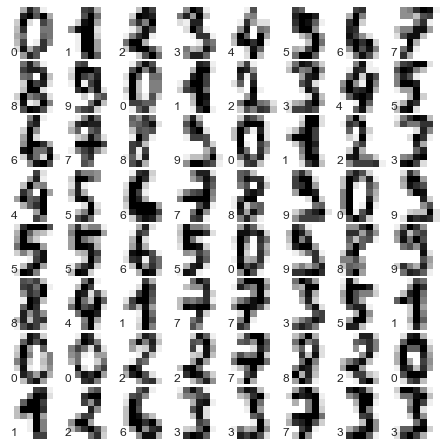

In [13]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We can quickly classify the digits using a random forest as follows:

In [14]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

We can take a look at the classification report for this classifier:

In [15]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.98      0.99        44
          2       0.95      1.00      0.98        42
          3       0.98      0.96      0.97        46
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.96      0.98      0.97        46

avg / total       0.98      0.98      0.98       450



And for good measure, plot the confusion matrix:

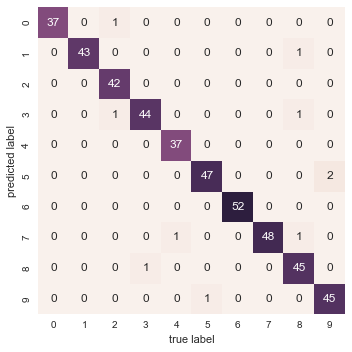

In [16]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

We find that a simple, untuned random forest results in a very accurate classification of the digits data.

## Summary of Random Forests

This section contained a brief introduction to the concept of *ensemble estimators*, and in particular the random forest – an ensemble of randomized decision trees.
Random forests are a powerful method with several advantages:

- Both training and prediction are very fast, because of the simplicity of the underlying decision trees. In addition, both tasks can be straightforwardly parallelized, because the individual trees are entirely independent entities.

- The nonparametric model is extremely flexible, and can thus perform well on tasks that are under-fit by other estimators.

A primary disadvantage of random forests is that the results are not easily interpretable: that is, if you would like to draw conclusions about the *meaning* of the classification model, random forests may not be the best choice.

Source: Jake VanderPlas, Python Data Science Handbook

# Visualization of tree plots.
Python 3 visualization in jupyter notebooks is under construction.  So we will need to use a workaround.
We will generate a file with text that describes the structure of the tree.  Then we will paste text from this file to http://webgraphviz.com/ to generate the plot.

In [131]:
import numpy as np
from sklearn import datasets
from sklearn import tree

# Load iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Build decision tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt2 = dt.fit(X, y)

dotfile = open("dt2.dot", 'w')
tree.export_graphviz(dt2, out_file=dotfile, feature_names=iris.feature_names,class_names=iris.target_names )
dotfile.close()

#The file dt2.dot will be saved to the folder where your jupyter notebook is saved.
#Open the file, copy the text, and paste it to http://webgraphviz.com/ to generate a basic tree plot.

In [129]:
?tree.export_graphviz()
